# Setup



In [ ]:
!git clone https://github.com/ultralytics/yolov3  # clone repo
%cd yolov3
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/shapes/labels.zip -d /content/shapes/ 

Archive:  /content/shapes/labels.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/shapes/labels.zip or
        /content/shapes/labels.zip.zip, and cannot find /content/shapes/labels.zip.ZIP, period.


In [ ]:
!ls

data	    hubconf.py	README.md	  test.py	  utils
detect.py   LICENSE	requirements.txt  train.py	  weights
Dockerfile  models	shapes.yaml	  tutorial.ipynb


# Train



In [ ]:
!python train.py --img 640 --batch 16 --epochs 6 --data shapes.yaml --weights yolov3-tiny.pt

github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='shapes.yaml', device='', entity=None, epochs=6, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov3-tiny.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, w

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['/content/yolov3/runs/train/exp/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 48 layers, 8671312 parameters, 0 gradients, 12.9 GFLOPS
image 1/3 /con

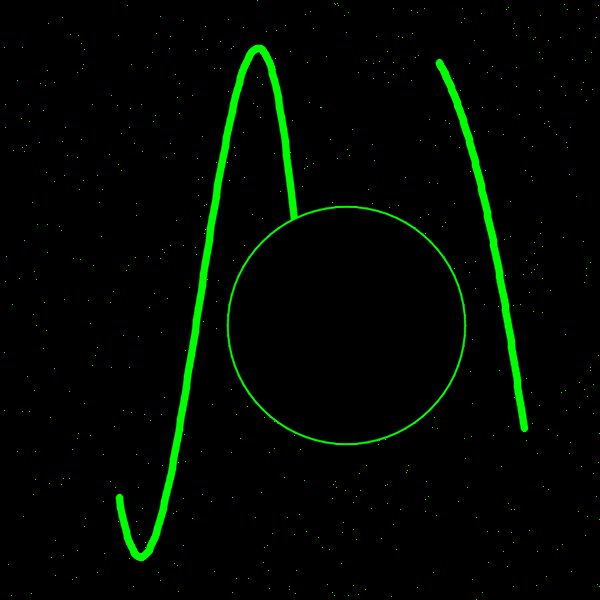

In [ ]:
!python detect.py --weights /content/yolov3/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source data/images/
Image(filename='/content/yolov3/data/images/circle0(1).png', width=600)

# Test

In [ ]:
# Run YOLOv3 on COCO val2017
!python test.py --weights yolov3.pt --data shapes.yaml --img 194 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='shapes.yaml', device='', exist_ok=False, img_size=194, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
val: Scanning '../drive/MyDrive/ML/shapes/labels/train.cache' images and labels... 11160 found, 0 missing, 0 empty, 0 corrupted: 100% 11160/11160 [00:00<?, ?it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95:  12% 43/349 [00:27<03:13,  1.59it/s]
Traceback (most recent call last):
  File "test.py", line 329, in <module>
    opt=opt
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "test.py",

In [ ]:
# Run YOLOv3 on COCO test-dev2017 using --task test
!python test.py --weights yolov3.pt --data shapes.yaml --task test

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='shapes.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='test', verbose=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
Traceback (most recent call last):
  File "test.py", line 329, in <module>
    opt=opt
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "test.py", line 91, in test
    dataloader = create_dataloader(data[task], imgsz, batch_size, gs, opt, pad=0.5, rect=True,
KeyError: 'test'


#  Visualize

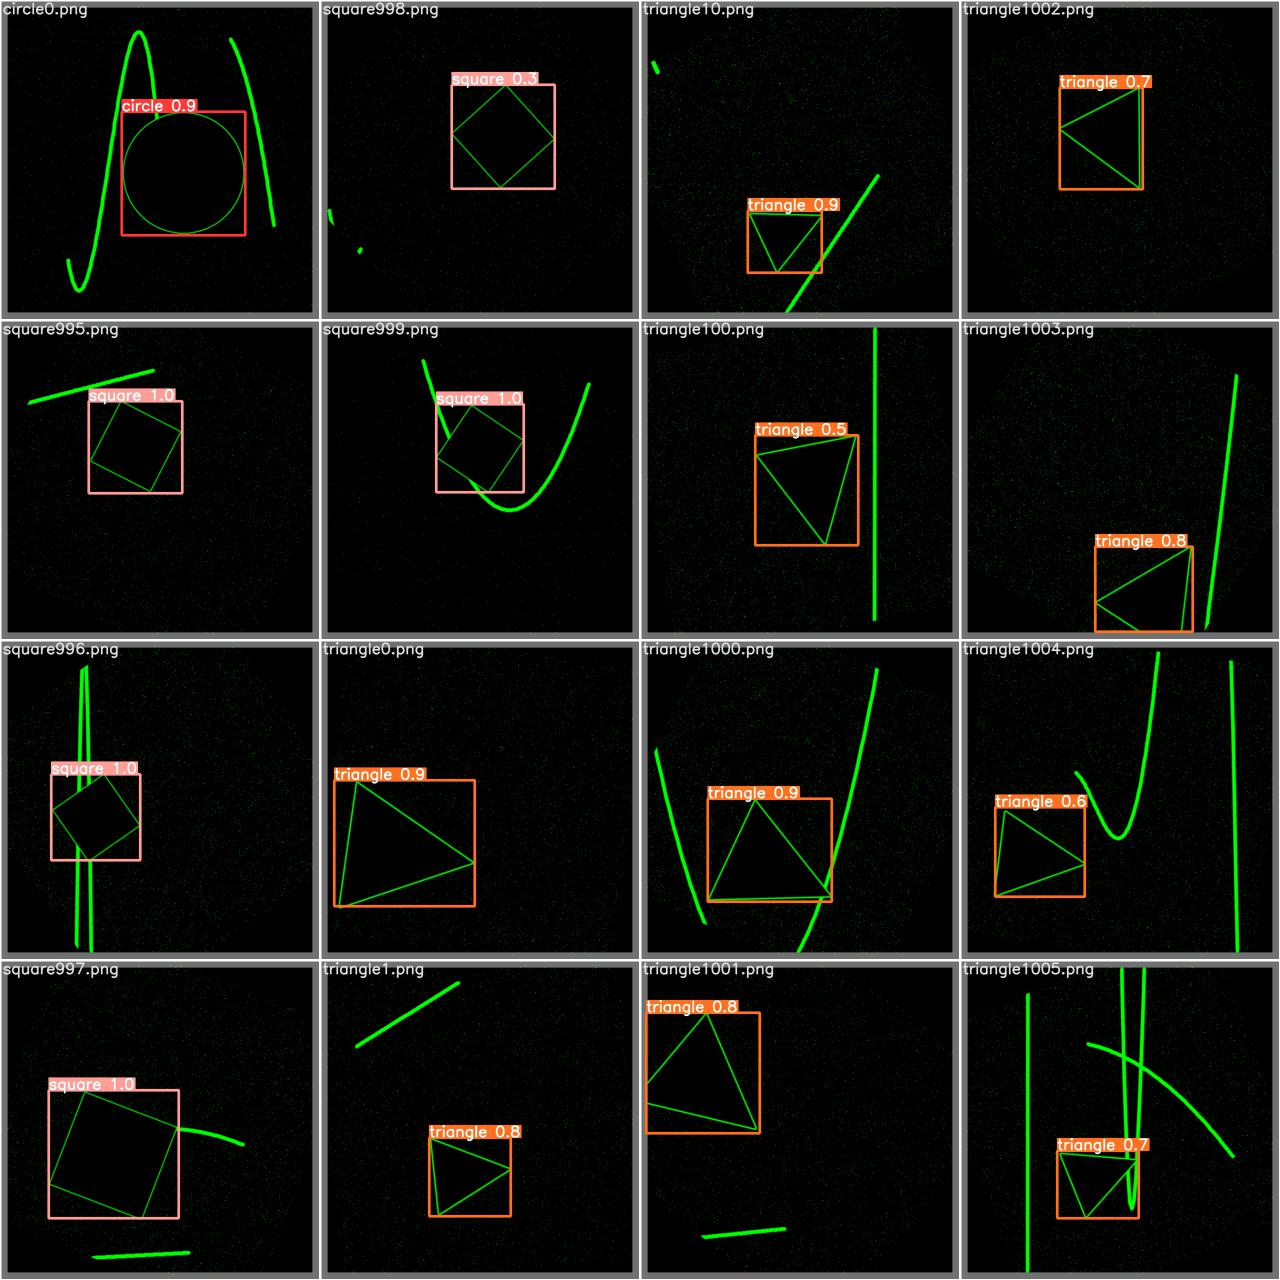

In [ ]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

# Input Data Formatting

In [ ]:
import os

In [ ]:
image = np.zeros((3, 3, 3), dtype='uint8')
for s in ["circle","square","triangle"]:
    for i in range(3720):
        #cv2.imwrite("/content/yolov3/D:smaa\code\shapes\images	rain\{}{}.png".format(s,i), image)
        os.remove("/content/yolov3/D:smaa\code\shapes\images	rain\{}{}.png".format(s,i))


In [ ]:
import torch, torchvision
from matplotlib import pyplot as plt
import numpy as np
import threading
from random import randrange
import os, json, cv2, random, imutils

In [ ]:
#function to get bound box of image
def find_boundbox(image):
    #find pixels that arent black and get the rectangle around it
    bin = cv2.inRange(image, (0, 0, 0), (0, 0,0))
    cv2.bitwise_not(bin, bin)
    cnts = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)#get points of contour around the shape
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
    rect = cv2.boundingRect(cnts[0])# from points get x y w h
    return rect #x y w h

def draw_polynomial(image,length):
    n = randrange(6)
    x =[]
    y =[]
    if(n == 0):
        return image
    for i in range(n+1):
        x.append(randrange(length))
        y.append(randrange(length))
    x = np.array(x)
    y = np.array(y)

    #calculate the coefficients.
    z = np.polyfit(x, y, n)
    s = randrange(length)
    e = min(randrange(length),length)
    lspace = np.linspace(s,e , 100)
    
    draw_x = lspace
    draw_y = np.polyval(z, draw_x)   # evaluate the polynomial

    draw_points = (np.asarray([draw_x, draw_y]).T).astype(np.int32)   # needs to be int32 and transposed

    cv2.polylines(image, [draw_points], False, (0, 255, 0), 6,cv2.LINE_AA)  # args: image, points, closed, color
    #plt.imshow(image)
    #plt.show()
    return image
def random_change_image(image):
    img = image.copy()
    x = randrange(5000)
    for i in range(x):
        img[randrange(img.shape[0]),randrange(img.shape[1]),:]=[0, 255, 0]
        #print(img[x,y,:])
    return img

def draw_shape(shape,i):
    length = 600
    image = np.zeros((length, length, 3), dtype='uint8')
    img_filled =  np.ones((length, length, 3), dtype='uint8')*255
    
    if(shape == "triangle"):
        x = randrange(250)
        y = randrange(250)
        s = randrange(150)+100
        #pt1 = []
        pts = np.array([[x, y], [x+s, y], 
                [x+s//2, y+s]],np.int32)    
        pts = pts.reshape((-1, 1, 2))
        image = cv2.polylines(image, [pts], True, (0, 255, 0), 6,cv2.LINE_AA)
        angle = randrange(180)
        image_center = tuple(np.array(image.shape[1::-1]) / 2)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
        image = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
        
        img_filled = cv2.fillPoly(img_filled, [pts], (0, 0, 0),cv2.LINE_AA)
        image_center = tuple(np.array(img_filled.shape[1::-1]) / 2)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
        img_filled = cv2.warpAffine(img_filled, rot_mat, img_filled.shape[1::-1], flags=cv2.INTER_LINEAR)
        
    if(shape == "circle"):
        x = randrange(250)+120
        y = randrange(250)+120
        s = randrange(120)+50
        image = cv2.circle(image, (x, y,), s, (0, 255, 0), 4,cv2.LINE_AA)
        
        img_filled = cv2.circle(img_filled, (x, y,), s, (0, 0, 0), -1,cv2.LINE_AA)
        
    if(shape == "square"):
        x = randrange(200)+100
        y = randrange(200) +100
        s = randrange(150)+100
        image = cv2.rectangle(image, (x, y,),(x+s,y+s,), (0, 255, 0), 4,cv2.LINE_AA)
        
        angle = randrange(90)
        image_center = tuple(np.array(image.shape[1::-1]) / 2)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
        image = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
        
        
        img_filled = cv2.rectangle(img_filled, (x, y,),(x+s,y+s,), (0, 0, 0), -1,cv2.LINE_AA)
        image_center = tuple(np.array(img_filled.shape[1::-1]) / 2)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
        img_filled = cv2.warpAffine(img_filled, rot_mat, img_filled.shape[1::-1], flags=cv2.INTER_LINEAR)

    
    bb = find_boundbox(image)
    image = random_change_image(image)  
    image = draw_polynomial(image,length)
    image = draw_polynomial(image,length)
    image = cv2.bitwise_and(image, img_filled)
    cv2.imwrite('../drive/MyDrive/ML/shapes/images/train/{}{}.png'.format(shape,i), image)
    #plt.imshow(image)
    #plt.show()
    #plt.imshow(img_filled)
    #plt.show()
    return bb

s = {'circle': '0', 'square': '1', 'triangle': '2'}
length = 600
image = np.zeros((length, length, 3), dtype='uint8')
for sh in ["triangle"]:
    for i in range(3720):
        rect = draw_shape(sh,i)
        with open('../drive/MyDrive/ML/shapes/labels/train/{}{}.txt'.format(sh,i), 'w') as f:
            f.write('{} {} {} {} {}'.format(s[sh],(rect[0]+rect[2]/2)/image.shape[1],(rect[1]+rect[3]/2)/image.shape[0],rect[2]/image.shape[1],rect[3]/image.shape[0]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RankWarning: Polyfit may be poor

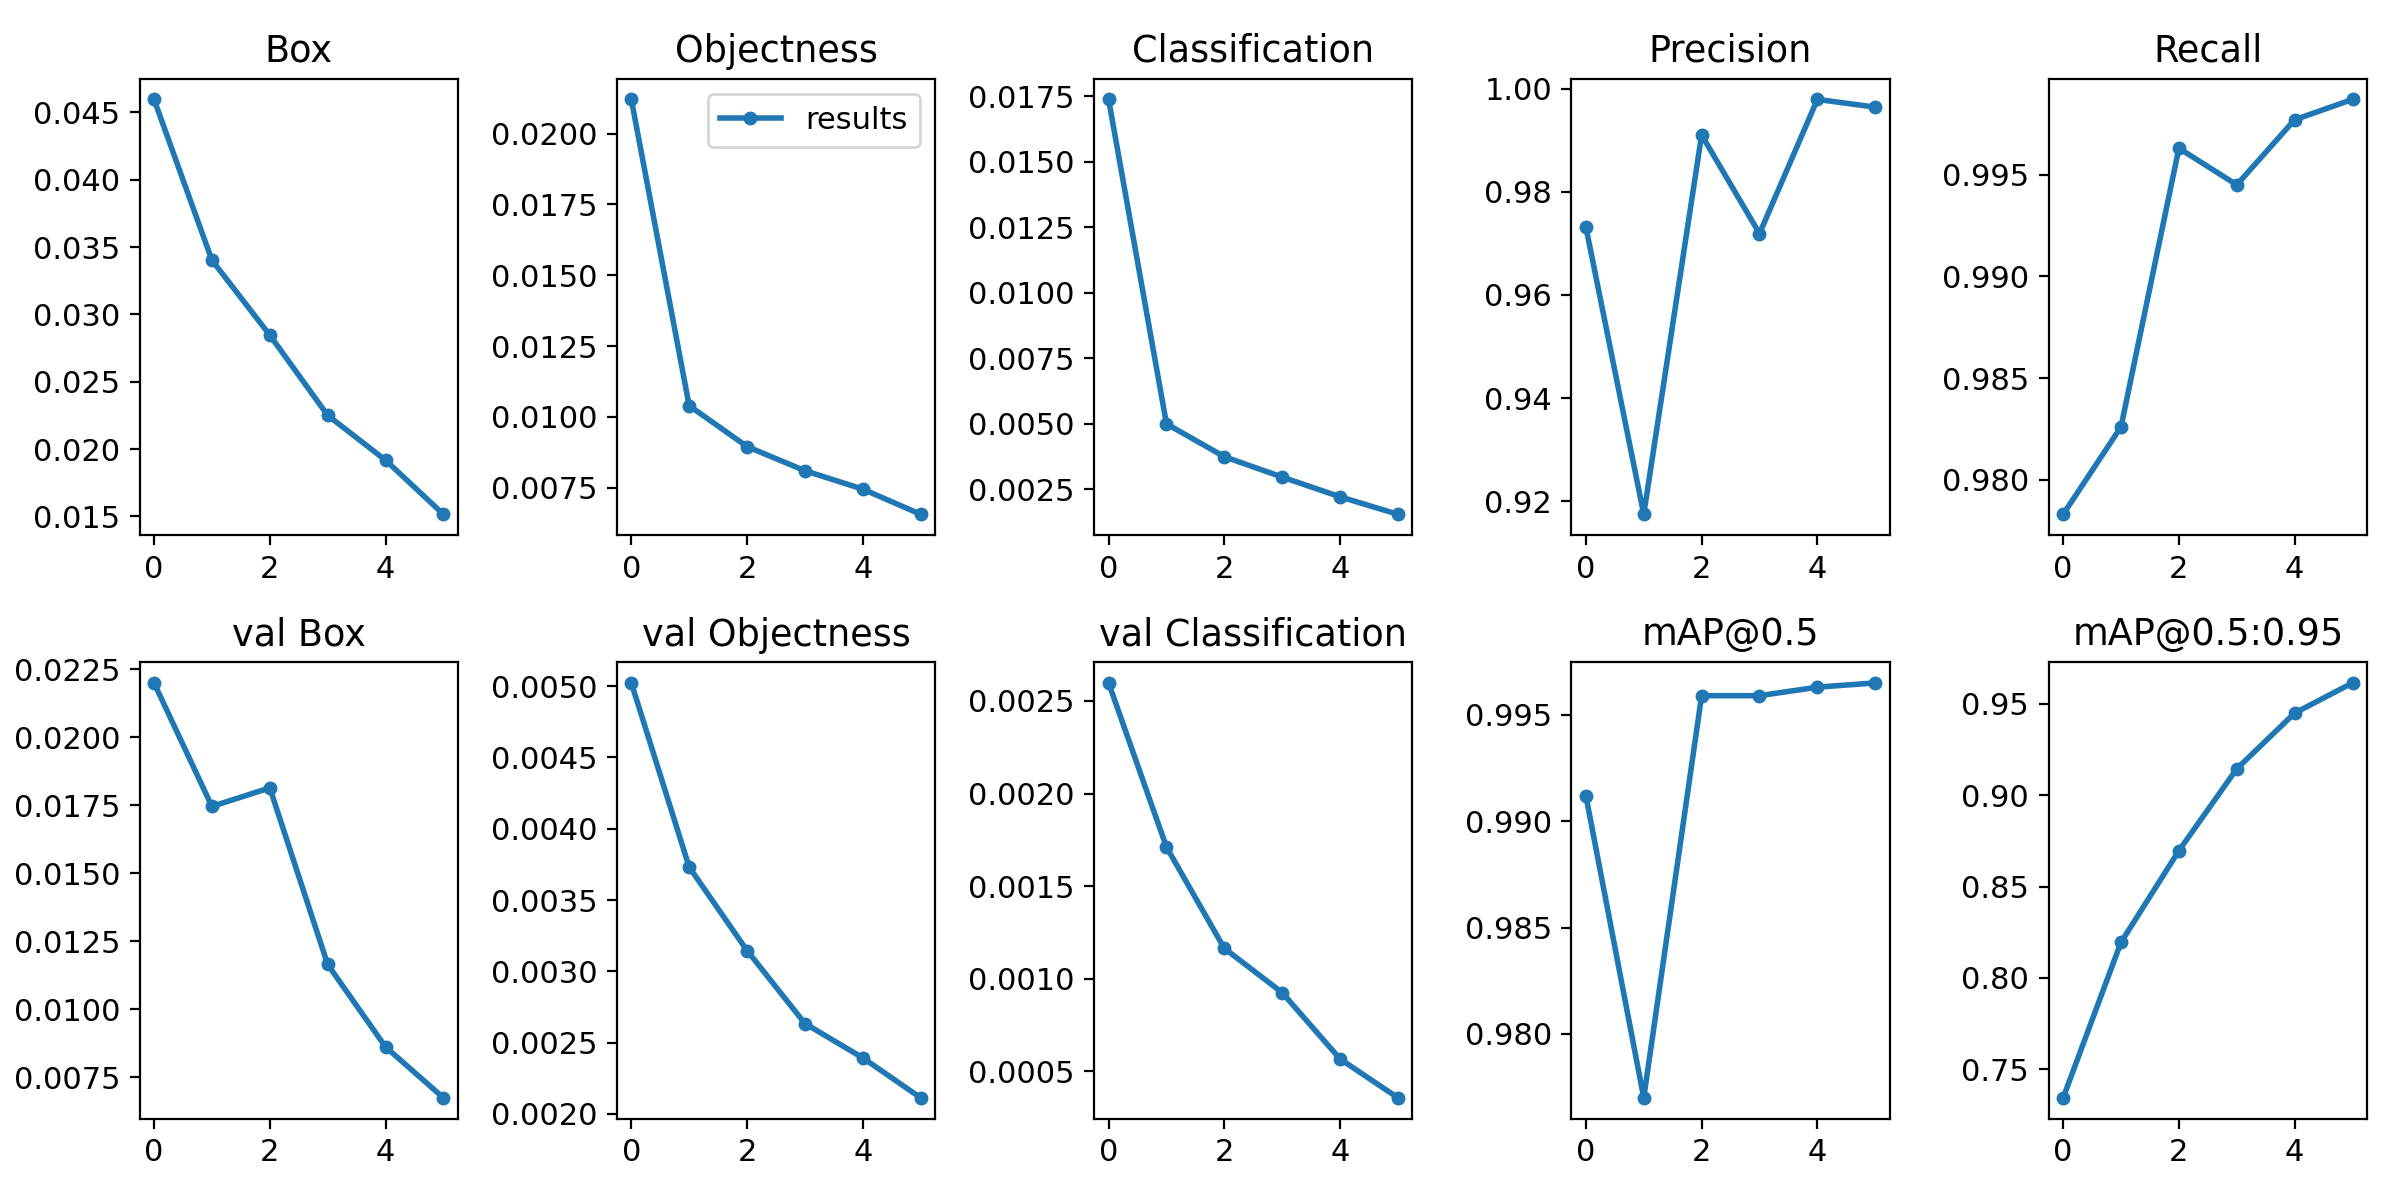

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

In [ ]:
# EXTRA TEST CELL UNITS
'''#  Re-clone repo
%cd ..
%rm -rf yolov3 && git clone https://github.com/ultralytics/yolov3
%cd yolov3'''

In [ ]:
'''# Unit of tests
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories

rm -rf runs  # remove runs/
for m in yolov3; do  # models
  python train.py --weights $m.pt --epochs 3 --img 320 --device 0  # train pretrained
  python train.py --weights '' --cfg $m.yaml --epochs 3 --img 320 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
    python test.py --weights $m.pt --device $d # test official
    python test.py --weights runs/train/exp/weights/best.pt --device $d # test custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # inspect
  python models/export.py --weights $m.pt --img 640 --batch 1  # export
done'''

# **Video feed**

In [ ]:
''' import cv2
from darkflow.net.build import TFNet
import numpy as np
import time

options = {
	'model' : 'C:/Users/Dell/Desktop/Programming/YOLO/darkflow-master/cfg/yolo.cfg',
	'load' : 'C:/Users/Dell/Desktop/Programming/YOLO/darkflow-master/bin/yolov2.weights',
	'threshold' : 0.15,
}

tfnet = TFNet(options)
capture = cv2. VideoCapture('vid1.mp4')
colors = [tuple(255 * np.random.rand(3)) for i in range(5)]
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
output = cv2.VideoWriter('labelled.mp4',fourcc,20.0,(640,480))
while (capture.isOpened()):
	ret, frame = capture.read()
	results = tfnet.return_predict(frame)
	if ret:
		for color, result in zip(colors,results):
			tl = (result['topleft']['x'],result['topleft']['y'])
			br = (result['bottomright']['x'],result['bottomright']['y'])
			label = result['label']
			frame = cv2.rectangle(frame, tl,br,(0,255,0), 4)
			frame = cv2.putText(frame,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
			output.write(frame)
		cv2.imshow('frame',frame)
		if cv2.waitKey(1) & 0xFF == ord('q'):
			break
	else:
		break
capture.release()
output.release()
cv2.destroyAllWindows()'''

# **Another Yolo Model solution with version 3**

In [ ]:
to_run = True 

In [ ]:
if to_run:
  !git clone https://github.com/AntonMu/TrainYourOwnYOLO
  %cd TrainYourOwnYOLO
  !pip install -r requirements.txt
  to_run = False
  !wandb login

Cloning into 'TrainYourOwnYOLO'...
remote: Enumerating objects: 581, done.
remote: Counting objects: 100% (581/581), done.
remote: Compressing objects: 100% (450/450), done.
remote: Total 581 (delta 122), reused 579 (delta 121), pack-reused 0
Receiving objects: 100% (581/581), 67.57 MiB | 33.20 MiB/s, done.
Resolving deltas: 100% (122/122), done.
/content/TrainYourOwnYOLO
     |████████████████████████████████| 320.4 MB 10 kB/s 
     |████████████████████████████████| 1.7 MB 40.0 MB/s 
     |████████████████████████████████| 148 kB 54.3 MB/s 
     |████████████████████████████████| 459 kB 44.4 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.9 MB 42.7 MB/s 
     |████████████████████████████████| 139 kB 54.3 MB/s 
     |████████████████████████████████| 180 kB 51.0 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 748 kB 65

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from google.colab import drive
# uncomment the next line before running this cell
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#uncomment these instructions:
#!rm /content/TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export/*
#!rm /content/TrainYourOwnYOLO/Data/Source_Images/Test_Images/*


#!cp -av '/content/drive/MyDrive/AI_ML/Colab_Notebooks/Torpedo/final_pro_for_trainees/10_14method/dataset/train' '/content/TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export/'
#!cp -av '/content/drive/MyDrive/AI_ML/Colab_Notebooks/Torpedo/final_pro_for_trainees/10_14method/dataset/test' '/content/TrainYourOwnYOLO/Data/Source_Images/Test_Images/'







'/content/drive/MyDrive/AI_ML/Colab_Notebooks/Torpedo/final_pro_for_trainees/10_14method/dataset/test' -> '/content/TrainYourOwnYOLO/Data/Source_Images/Test_Images/test'
'/content/drive/MyDrive/AI_ML/Colab_Notebooks/Torpedo/final_pro_for_trainees/10_14method/dataset/test/triangle' -> '/content/TrainYourOwnYOLO/Data/Source_Images/Test_Images/test/triangle'
'/content/drive/MyDrive/AI_ML/Colab_Notebooks/Torpedo/final_pro_for_trainees/10_14method/dataset/test/triangle/triangle2.png' -> '/content/TrainYourOwnYOLO/Data/Source_Images/Test_Images/test/triangle/triangle2.png'
'/content/drive/MyDrive/AI_ML/Colab_Notebooks/Torpedo/final_pro_for_trainees/10_14method/dataset/test/triangle/triangle0.png' -> '/content/TrainYourOwnYOLO/Data/Source_Images/Test_Images/test/triangle/triangle0.png'
'/content/drive/MyDrive/AI_ML/Colab_Notebooks/Torpedo/final_pro_for_trainees/10_14method/dataset/test/triangle/triangle1.png' -> '/content/TrainYourOwnYOLO/Data/Source_Images/Test_Images/test/triangle/triangle1

In [ ]:
!python Minimal_Example.py



| |                           #                     | 7533 Elapsed Time: 0:00:02
Downloaded Pretrained Weights in 4.3 seconds 

Detecting Cat Faces by calling: 

 python /content/TrainYourOwnYOLO/3_Inference/Detector.py --input_path /content/TrainYourOwnYOLO/Data/Source_Images/Test_Images --classes /content/TrainYourOwnYOLO/Data/Model_Weights/data_classes.txt --output /content/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results --yolo_model /content/TrainYourOwnYOLO/Data/Model_Weights/trained_weights_final.h5 --box_file /content/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/Detection_Results.csv --anchors /content/TrainYourOwnYOLO/2_Training/src/keras_yolo3/model_data/yolo_anchors.txt --file_types .jpg .jpeg .png  

2021-10-15 00:23:41.149162: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-10-15 00:23:44.688756: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Su

In [ ]:
%cd 2_Training
!python Download_and_Convert_YOLO_weights.py

/content/TrainYourOwnYOLO/2_Training


| |              #                                  | 7568 Elapsed Time: 0:00:01
Downloaded Raw yolov3.weights in 2.6 seconds

2021-10-15 00:24:13.440465: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
2021-10-15 00:24:15.295054: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-10-15 00:24:15.308111: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-15 00:24:15.308181: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (577649c2cc43): /proc/driver/nvidia/version does not exist
2

In [ ]:
!python Train_YOLO.py

In [ ]:
%cd 3_Inference/

/content/TrainYourOwnYOLO/3_Inference


In [ ]:
!python Detector.py

In [ ]:
#model was saved in yolo.h5

# **installation & importing Libraries to be used in R-CNN (not in YOLO v3)** 

In [ ]:
''!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e detectron2''

Cloning into 'detectron2'...
remote: Enumerating objects: 13232, done.
remote: Counting objects: 100% (733/733), done.
remote: Compressing objects: 100% (385/385), done.
remote: Total 13232 (delta 432), reused 567 (delta 344), pack-reused 12499
Receiving objects: 100% (13232/13232), 5.71 MiB | 625.00 KiB/s, done.
Resolving deltas: 100% (9392/9392), done.
Obtaining file:///content/detectron2
     |████████████████████████████████| 49 kB 2.3 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 145 kB 34.5 MB/s 
     |████████████████████████████████| 130 kB 68.4 MB/s 
     |████████████████████████████████| 748 kB 51.5 MB/s 
     |████████████████████████████████| 743 kB 42.9 MB/s 
     |████████████████████████████████| 636 kB 54.7 MB/s 
     |████████████████████████████████| 112 kB 72.2 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210924-py3-none-any.whl size=60829 sha256=aaa62b8ca3c6a4d9cd434954cb24df38e242aa8d3866e0e2

In [ ]:
'''!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo'''

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.5
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [ ]:
import torch, torchvision
'''import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()'''
from matplotlib import pyplot as plt
import numpy as np
import os, json, cv2, random, imutils
'''from detectron2 import model_zoo
from detectron2.structures import BoxMode
from detectron2.engine import DefaultPredictor,DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog'''

%matplotlib inline

In [ ]:
from IPython.display import Image, clear_output  

clear_output()